In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
single_image = x_train[0]

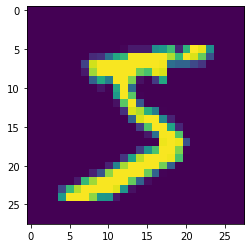

In [5]:
plt.imshow(single_image)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this:

In [7]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [8]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [12]:
print(y_cat_test[0:5,:])
print(y_test[0:5])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[7 2 1 0 4]


In [13]:
y_test[0]

7

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
scaled_single = x_train[0]

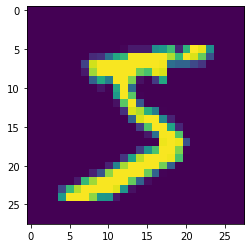

In [16]:
plt.imshow(scaled_single)

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
x_test.shape

(10000, 28, 28)

In [19]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [20]:
x_train.shape

(60000, 28, 28, 1)

In [21]:
x_test = x_test.reshape(10000,28,28,1)

In [22]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [25]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [26]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test))

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2738 - accuracy: 0.9160 - val_loss: 0.0604 - val_accuracy: 0.9807
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0507 - accuracy: 0.9843 - val_loss: 0.0374 - val_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0298 - accuracy: 0.9909 - val_loss: 0.0423 - val_accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0193 - accuracy: 0.9941 - val_loss: 0.0340 - val_accuracy: 0.9880
Epoch 5/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0392 - val_accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.0375 - val_accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0477 -

In [27]:
model.metrics_names

['loss', 'accuracy']

In [28]:
losses = pd.DataFrame(model.history.history)

In [30]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.136961,0.958400,0.060355,0.9807
1,0.048594,0.985000,0.037357,0.9877
2,0.031222,0.990383,0.042345,0.9858
3,0.020748,0.993533,0.033987,0.9880
4,0.015182,0.994817,0.039193,0.9882
5,0.011166,0.996383,0.037461,0.9891
6,0.008442,0.997100,0.047732,0.9875
7,0.006765,0.997817,0.038438,0.9886
8,0.006002,0.997800,0.039862,0.9894
9,0.003593,0.998800,0.054288,0.9866


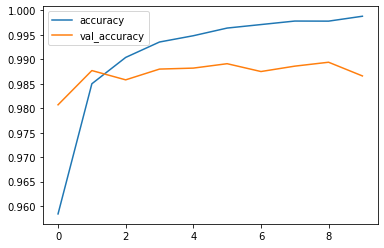

In [31]:
losses[['accuracy','val_accuracy']].plot()

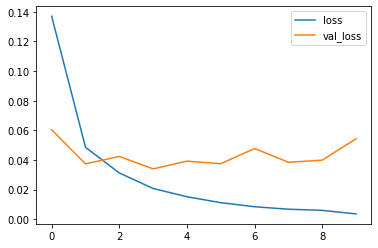

In [32]:
losses[['loss','val_loss']].plot()

In [33]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.05428829416632652, 0.9865999817848206]


In [34]:
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [35]:
predictions[0]

7

In [36]:
y_test[0]

7

In [37]:
np.sum(1*(predictions==y_test))

9866

In [38]:
np.sum(1*(predictions!=y_test))

134

In [39]:
my_number = x_test[0]

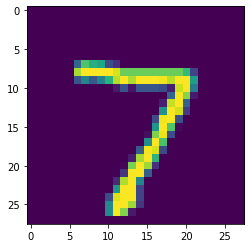

In [40]:
plt.imshow(my_number.reshape(28,28))

In [41]:
model.predict_classes(my_number.reshape(1,28,28,1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])